In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten, Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
%matplotlib inline

In [170]:
## Plotly
#import plotly.offline as py
#import plotly.graph_objs as go
#py.init_notebook_mode(connected=True)
# Others
from sklearn.manifold import TSNE


In [171]:
train = pd.read_csv('C://Piazza//CUTe4//train.csv', encoding='latin-1')
test = pd.read_csv('C://Piazza//CUTe4//test.csv', encoding='latin-1')

print(train.shape)
print(test.shape)

(48699, 2)
(8581, 2)


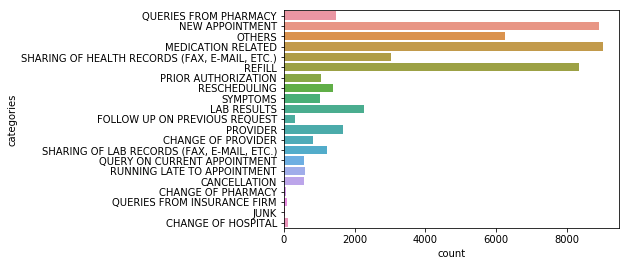

In [82]:
sns.countplot(y=train['categories'], orient=True)

In [172]:
weights = 1/train.categories.value_counts()

In [173]:
dict_weight = dict(1/train.categories.value_counts())
dict_weight

{'CANCELLATION': 0.0017730496453900709,
 'CHANGE OF HOSPITAL': 0.007874015748031496,
 'CHANGE OF PHARMACY': 0.02127659574468085,
 'CHANGE OF PROVIDER': 0.0012330456226880395,
 'FOLLOW UP ON PREVIOUS REQUEST': 0.003289473684210526,
 'JUNK': 0.05555555555555555,
 'LAB RESULTS': 0.0004438526409232135,
 'MEDICATION RELATED': 0.00011098779134295228,
 'NEW APPOINTMENT': 0.00011227124733355787,
 'OTHERS': 0.00015992323684631377,
 'PRIOR AUTHORIZATION': 0.0009587727708533077,
 'PROVIDER': 0.0005963029218843172,
 'QUERIES FROM INSURANCE FIRM': 0.01098901098901099,
 'QUERIES FROM PHARMACY': 0.0006830601092896175,
 'QUERY ON CURRENT APPOINTMENT': 0.0017889087656529517,
 'REFILL': 0.00011980352222355337,
 'RESCHEDULING': 0.0007230657989877079,
 'RUNNING LATE TO APPOINTMENT': 0.001694915254237288,
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)': 0.0003313452617627568,
 'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)': 0.0008250825082508251,
 'SYMPTOMS': 0.0009794319294809011}

In [174]:
manual_class_dict3 = {0: 2.5,
 1: 5.0,
 2: 5.0,
 3: 3.5,
 4: 4.5,
 5: 6.0,
 6: 1.5,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 2.0,
 11: 1.5,
 12: 5.0,
 13: 1.5,
 14: 4.5,
 15: 1.0,
 16: 2.0,
 17: 2.5,
 18: 1.0,
 19: 1.5,
 20: 2.5}

In [175]:
manual_class_dict2 = {0: 2.5,
 1: 4.5,
 2: 4.5,
 3: 3.5,
 4: 4.5,
 5: 4.5,
 6: 1.5,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 2.0,
 11: 1.5,
 12: 4.5,
 13: 1.5,
 14: 4.5,
 15: 1.0,
 16: 2.0,
 17: 2.5,
 18: 1.0,
 19: 1.5,
 20: 2.5}

In [176]:
manual_class_dict1 = {0: 2.5,
 1: 4.0,
 2: 4.0,
 3: 3.0,
 4: 4.0,
 5: 4.0,
 6: 1.5,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 2.0,
 11: 1.5,
 12: 4.0,
 13: 1.5,
 14: 4.0,
 15: 1.0,
 16: 2.0,
 17: 2.5,
 18: 1.0,
 19: 1.5,
 20: 2.5}

In [178]:
keys = ['CANCELLATION', 'CHANGE OF HOSPITAL', 'CHANGE OF PHARMACY',
       'CHANGE OF PROVIDER', 'FOLLOW UP ON PREVIOUS REQUEST', 'JUNK',
       'LAB RESULTS', 'MEDICATION RELATED', 'NEW APPOINTMENT', 'OTHERS',
       'PRIOR AUTHORIZATION', 'PROVIDER', 'QUERIES FROM INSURANCE FIRM',
       'QUERIES FROM PHARMACY', 'QUERY ON CURRENT APPOINTMENT', 'REFILL',
       'RESCHEDULING', 'RUNNING LATE TO APPOINTMENT',
       'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)', 'SYMPTOMS']

In [179]:
counter = 0
class_dict = {}
for i in keys:
    class_dict[counter] = dict_weight[i]
    counter += 1

In [180]:
class_dict

{0: 0.0017730496453900709,
 1: 0.007874015748031496,
 2: 0.02127659574468085,
 3: 0.0012330456226880395,
 4: 0.003289473684210526,
 5: 0.05555555555555555,
 6: 0.0004438526409232135,
 7: 0.00011098779134295228,
 8: 0.00011227124733355787,
 9: 0.00015992323684631377,
 10: 0.0009587727708533077,
 11: 0.0005963029218843172,
 12: 0.01098901098901099,
 13: 0.0006830601092896175,
 14: 0.0017889087656529517,
 15: 0.00011980352222355337,
 16: 0.0007230657989877079,
 17: 0.001694915254237288,
 18: 0.0003313452617627568,
 19: 0.0008250825082508251,
 20: 0.0009794319294809011}

In [181]:
pd.DataFrame(weights).reset_index()

,index,categories
0,MEDICATION RELATED,0.000111
1,NEW APPOINTMENT,0.000112
2,REFILL,0.000120
3,OTHERS,0.000160
4,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",0.000331
5,LAB RESULTS,0.000444
6,PROVIDER,0.000596
7,QUERIES FROM PHARMACY,0.000683
8,RESCHEDULING,0.000723
9,"SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)",0.000825


In [182]:
print(train.columns)
len(train['categories'].unique())

Index(['categories', 'converse'], dtype='object')


21

In [183]:
unique_words = set(train['converse'])
print(len(unique_words))
len(train.converse.unique())

47265


47265

In [184]:
train= train.dropna()
train = train[train.converse.apply(lambda x: x !="")]

test = test.dropna()
test = test[test.converse.apply(lambda x: x !="")]

In [185]:
print('Dimensions of Train data after removing NA :', train.shape)
print('Dimensions of Test data after removing NA :', test.shape)

Dimensions of Train data after removing NA : (48667, 2)
Dimensions of Test data after removing NA : (8577, 2)


In [186]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [187]:
train['text'] = train['converse'].map(lambda x: clean_text(x))
test['text'] = test['converse'].map(lambda x: clean_text(x))

In [42]:
len(set(train['text']))

46808

In [69]:
test.columns

Index(['id', 'converse', 'text'], dtype='object')

In [96]:
df.columns

Index(['CANCELLATION', 'CHANGE OF HOSPITAL', 'CHANGE OF PHARMACY',
       'CHANGE OF PROVIDER', 'FOLLOW UP ON PREVIOUS REQUEST', 'JUNK',
       'LAB RESULTS', 'MEDICATION RELATED', 'NEW APPOINTMENT', 'OTHERS',
       'PRIOR AUTHORIZATION', 'PROVIDER', 'QUERIES FROM INSURANCE FIRM',
       'QUERIES FROM PHARMACY', 'QUERY ON CURRENT APPOINTMENT', 'REFILL',
       'RESCHEDULING', 'RUNNING LATE TO APPOINTMENT',
       'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)', 'SYMPTOMS'],
      dtype='object')

In [188]:
#le = LabelEncoder()
#Y = le.fit_transform(train['categories'])
#Y = Y.reshape(-1,1)
df = pd.get_dummies(train['categories'])
Y = df.values
X = train.text
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
trainX,testX,trainY,testY = train_test_split(X, Y, test_size = 20)
trainY

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [189]:
print(Y.shape)
X.shape

(48667, 21)


(48667,)

In [190]:
X = X.astype(str)

### Data Preprocessing
- Tokenize the data and convert the text to sequences.
- Add padding to ensure that all the sequences have the same shape.
- There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [191]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=False)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [192]:
sequences_matrix

array([[  0,   0,   0, ...,  30,  82, 291],
       [  0,   0,   0, ..., 256, 286, 259],
       [  0,   0,   0, ...,  14,  21,  12],
       ...,
       [  0,   0,   0, ...,  15,  98,  20],
       [  0,   0,   0, ...,  83, 158,   2],
       [  0,   0,   0, ..., 523, 272,   2]])

### RNN
- Define the RNN structure.

In [193]:
def RNN():
    inputs = Input(name = 'inputs', shape = [max_len])                 # Input Layer
    layer = Embedding(max_words, 50, input_length = max_len)(inputs)   # Reducing Dimention
    layer = LSTM(64)(layer)                                            # Learns Order Dependence Sequence
    layer = Dense(256, name = 'FC1')(layer)                            # Fully Connected Network Layer
    layer = Activation('relu')(layer)                                  # Converts Input Signal To Output Layer
    layer = Dropout(0.5)(layer)                                        # Dropping Hidden and Visible Layers
    layer = Dense(21, name = 'out_layer')(layer)                         
    layer = Activation('sigmoid')(layer)
    model = Model(inputs = inputs, outputs = layer)                    # Output Layer.
    return model

- call the function and compile the model

In [194]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer = RMSprop(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 21)                5397      
__________

- Fit The Model

In [195]:
################################### Not Required ###############################

In [23]:
Y_label

array([13,  8,  9, ..., 15,  8,  7])

In [21]:
print(trainY.shape)
le = LabelEncoder()
Y_label = le.fit_transform(train['categories'])
#Y_label = Y.reshape(-1,1)
Y_unique = trainY
Y_unique

(48647, 21)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
yy = [y.argmax() for y in trainY]

In [18]:
trainY

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(yy),
                                                  yy)

# class_weight : dict, ‘balanced’ or None
# If ‘balanced’, class weights will be given by n_samples / (n_classes * np.bincount(y)). 
# If a dictionary is given, keys are classes and values are corresponding class weights. 
# If None is given, the class weights will be uniform.

'''
class_weight = {0: 1.,
                1: 50.,      # Dict way of giving weights
                2: 2.}
'''

In [94]:
import math
dict1 = {}
dict1 = dict(train.categories.value_counts())

In [ ]:
def create_class_weight(labels_dict, mu=0.15):
    total = np.sum(labels_dict.values())
    keys = labels_dict.keys()
    class_weight = dict()

    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0

    return class_weight

# random labels_dict
labels_dict = {'CANCELLATION': 564,'CHANGE OF HOSPITAL': 127,'CHANGE OF PHARMACY': 47,'CHANGE OF PROVIDER': 811,
                'FOLLOW UP ON PREVIOUS REQUEST': 304,'JUNK': 18,'LAB RESULTS': 2253,'MEDICATION RELATED': 9010,
                'NEW APPOINTMENT': 8907,'OTHERS': 6253,'PRIOR AUTHORIZATION': 1043,'PROVIDER': 1677,'QUERIES FROM INSURANCE FIRM': 91,
                'QUERIES FROM PHARMACY': 1464,'QUERY ON CURRENT APPOINTMENT': 559,'REFILL': 8347, 'RESCHEDULING': 1383,
                'RUNNING LATE TO APPOINTMENT': 590,'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)': 3018,'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)': 1212,'SYMPTOMS': 1021}

create_class_weight(labels_dict)

In [66]:
sett = [set(train.categories)]
list_set = []
for i in sett:
    print(type(i))

<class 'set'>


In [81]:
#########################     Model Building     ############################

In [196]:
model.fit(sequences_matrix, Y, batch_size = 128, epochs = 7, validation_split = 0.2, class_weight = manual_class_dict3, 
           callbacks = [EarlyStopping(monitor = 'val_loss', min_delta = 0.0001)])

Train on 38933 samples, validate on 9734 samples
Epoch 1/7
38933/38933 [==============================] - 74s 2ms/step - loss: 0.2289 - acc: 0.9535 - val_loss: 0.1910 - val_acc: 0.9565
Epoch 2/7
38933/38933 [==============================] - 74s 2ms/step - loss: 0.1655 - acc: 0.9626 - val_loss: 0.1523 - val_acc: 0.9658
Epoch 3/7
38933/38933 [==============================] - 78s 2ms/step - loss: 0.1390 - acc: 0.9679 - val_loss: 0.1343 - val_acc: 0.9693
Epoch 4/7
38933/38933 [==============================] - 82s 2ms/step - loss: 0.1244 - acc: 0.9703 - val_loss: 0.1236 - val_acc: 0.9723
Epoch 5/7
38933/38933 [==============================] - 79s 2ms/step - loss: 0.1154 - acc: 0.9720 - val_loss: 0.1200 - val_acc: 0.9711
Epoch 6/7
38933/38933 [==============================] - 83s 2ms/step - loss: 0.1090 - acc: 0.9733 - val_loss: 0.1141 - val_acc: 0.9734
Epoch 7/7
38933/38933 [==============================] - 87s 2ms/step - loss: 0.1043 - acc: 0.9741 - val_loss: 0.1083 - val_acc: 0.9742

In [ ]:
################# Test Dataset ################

In [61]:
accr = model.evaluate(test_sequences_matrix, testY)

20/20 [==============================] - 0s 1ms/step


In [62]:
accr

[0.08237926661968231, 0.9666666984558105]

In [63]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.082
  Accuracy: 0.967


In [197]:
original_test = test.text

In [198]:
original_test = original_test.astype(str)

In [199]:
test_sequences1 = tok.texts_to_sequences(original_test)
test_sequences_matrix1 = sequence.pad_sequences(test_sequences1, maxlen=max_len)

In [200]:
df_model = model.predict(test_sequences_matrix1)
type(df_model)

numpy.ndarray

In [201]:
list2 = []
list3 = []

In [202]:
df_model

array([[2.7201299e-04, 4.3286080e-04, 3.0661156e-06, ..., 7.0520729e-04,
        5.6893427e-05, 3.3470139e-01],
       [2.3932196e-03, 1.3375298e-04, 3.0885928e-06, ..., 3.2037287e-03,
        3.4280468e-04, 1.0130660e-02],
       [3.5820660e-05, 1.4620673e-05, 1.8039252e-07, ..., 3.8839182e-05,
        2.1031083e-06, 3.7419844e-01],
       ...,
       [2.1922268e-04, 2.4419578e-04, 1.8348019e-05, ..., 1.0713062e-03,
        5.2520438e-05, 2.4628596e-01],
       [5.2069249e-06, 1.7393826e-04, 4.8061233e-06, ..., 7.5278133e-01,
        7.5174198e-02, 2.2428485e-05],
       [6.5647000e-03, 1.9519838e-02, 4.6784779e-05, ..., 2.3117267e-02,
        3.0918909e-02, 4.7340799e-02]], dtype=float32)

In [203]:
for i in df_model:
    list2.append(np.where(i == i.max()))
for i in list2:
    list3.append(i[0][0])

In [207]:
cols = df.columns
columns = []
for i in list3:
    columns.append(cols[i])

print (len(columns))
len(set(columns))

8577


17

In [208]:
predic_other = pd.DataFrame({'predictions':columns})
predic_other.head()

,predictions
0,MEDICATION RELATED
1,OTHERS
2,MEDICATION RELATED
3,QUERIES FROM PHARMACY
4,MEDICATION RELATED


In [209]:
sample_sub = pd.read_csv('C:\\Piazza\\CUTe4\\sample_submission.csv')
sample_sub.head()

,id,categories
0,1,NEW APPOINTMENT
1,2,NEW APPOINTMENT
2,3,MEDICATION RELATED
3,4,QUERIES FROM PHARMACY
4,5,MEDICATION RELATED


In [210]:
final = pd.DataFrame()
final1['id'] = sample_sub[['id']] 
final1.head()

,id,predictions
0,1,MEDICATION RELATED
1,2,OTHERS
2,3,MEDICATION RELATED
3,4,QUERIES FROM PHARMACY
4,5,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)"


In [211]:
final1['predictions'] = predic_other[['predictions']]
final1.head()

,id,predictions
0,1,MEDICATION RELATED
1,2,OTHERS
2,3,MEDICATION RELATED
3,4,QUERIES FROM PHARMACY
4,5,MEDICATION RELATED


In [212]:
final1.to_csv('C:\\Piazza\\CUTe4\\predictions_manual_weights3.csv',index=False)

In [213]:
final1.predictions.unique()

array(['MEDICATION RELATED', 'OTHERS', 'QUERIES FROM PHARMACY',
       'PROVIDER', 'RESCHEDULING', 'NEW APPOINTMENT', 'LAB RESULTS',
       'REFILL', 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
       'SYMPTOMS', 'PRIOR AUTHORIZATION', 'CANCELLATION',
       'CHANGE OF PROVIDER', 'QUERY ON CURRENT APPOINTMENT',
       'RUNNING LATE TO APPOINTMENT',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
       'FOLLOW UP ON PREVIOUS REQUEST', nan], dtype=object)

In [214]:
len(final1.predictions.unique())

18

In [215]:
final1.predictions.value_counts()

MEDICATION RELATED                               1889
NEW APPOINTMENT                                  1536
REFILL                                           1447
OTHERS                                            863
LAB RESULTS                                       471
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     457
PROVIDER                                          367
QUERIES FROM PHARMACY                             251
CHANGE OF PROVIDER                                247
RESCHEDULING                                      244
PRIOR AUTHORIZATION                               207
QUERY ON CURRENT APPOINTMENT                      174
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)        137
RUNNING LATE TO APPOINTMENT                       104
SYMPTOMS                                           97
CANCELLATION                                       70
FOLLOW UP ON PREVIOUS REQUEST                      16
Name: predictions, dtype: int64